In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Diabetes.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)

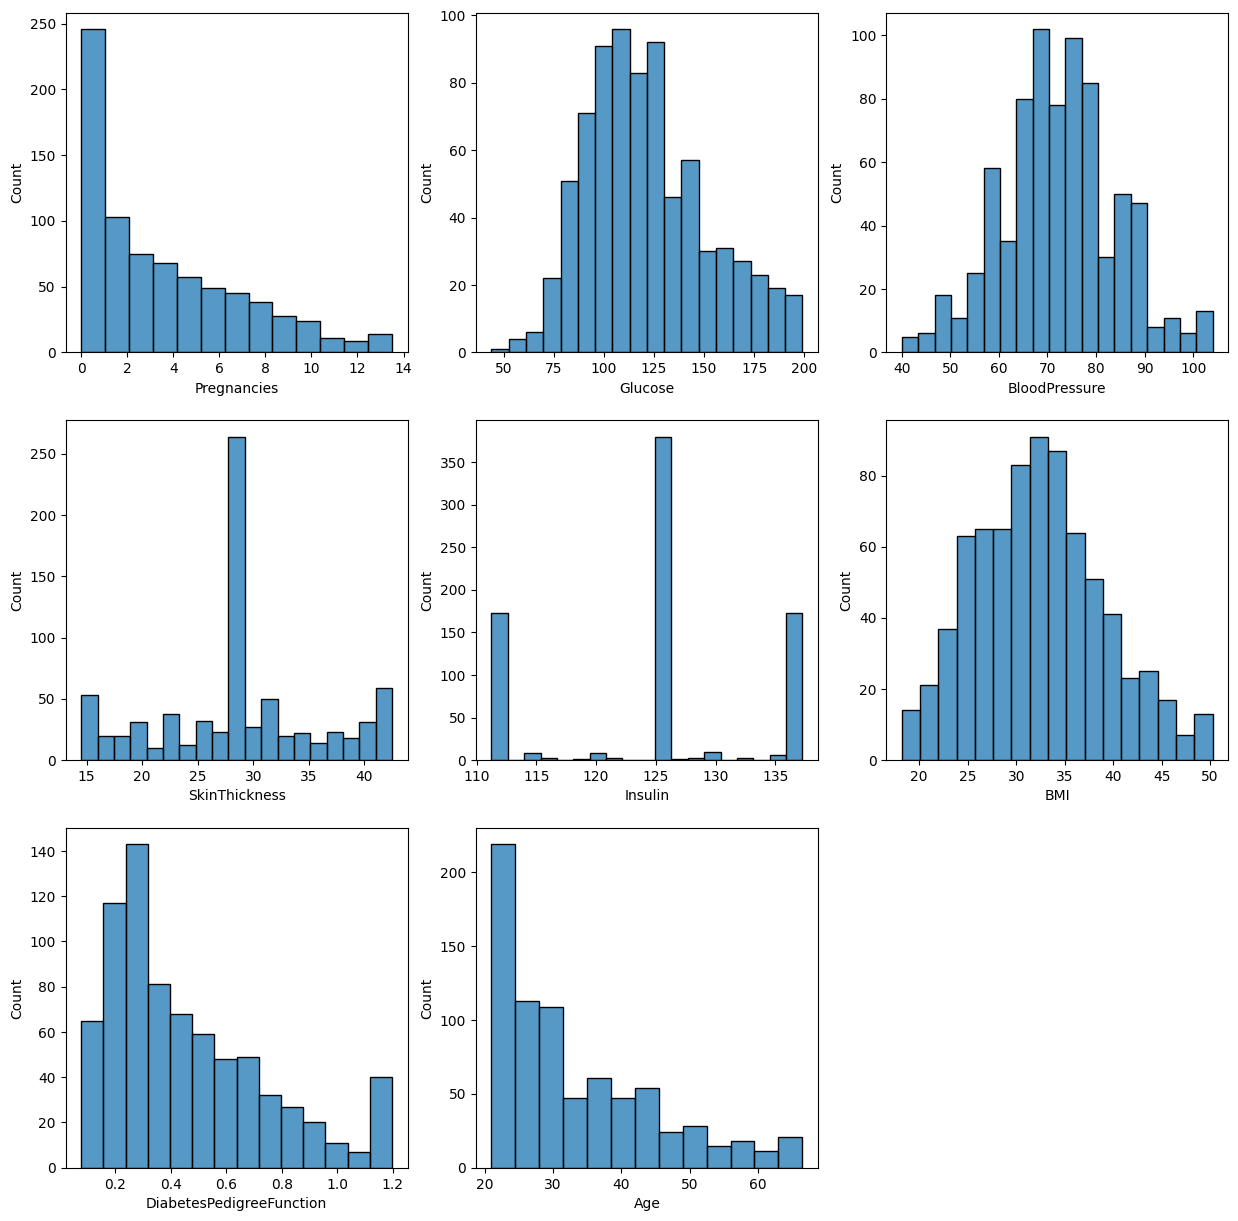

In [3]:
plt.figure(figsize=(15,15))
x=df.drop("Outcome",axis=1)
column=x.columns.to_list()
for i in range(0,len(column)):
    plt.subplot(3,3,i+1)
    sns.histplot(x=column[i],data=df)
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler
scaled_model=StandardScaler()

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,85.0,66.0,29.0,125.00,26.6,0.35100,31.0,0
1,8.0,183.0,64.0,29.0,125.00,23.3,0.67200,32.0,1
2,1.0,89.0,66.0,23.0,111.25,28.1,0.16700,21.0,0
3,0.0,137.0,40.0,35.0,137.25,43.1,1.19725,33.0,1
4,5.0,116.0,74.0,29.0,125.00,25.6,0.20100,30.0,0
...,...,...,...,...,...,...,...,...,...
762,10.0,101.0,76.0,42.5,137.25,32.9,0.17100,63.0,0
763,2.0,122.0,70.0,27.0,125.00,36.8,0.34000,27.0,0
764,5.0,121.0,72.0,23.0,112.00,26.2,0.24500,30.0,0
765,1.0,126.0,60.0,29.0,125.00,30.1,0.34900,47.0,1


In [6]:
x=df.drop("Outcome",axis=1)
y=pd.DataFrame(df["Outcome"])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score


In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((613, 8), (154, 8), (613, 1), (154, 1))

In [9]:
x_train_scaled=scaled_model.fit_transform(x_train)
x_test_scaled=scaled_model.transform(x_test)

In [10]:
params=dict()
params["n_estimators"]=[100,200,300,400,500]
params["max_depth"]=[15,20,25,30]
params["min_samples_leaf"]=[7,8,9,10,11,12]
params["criterion"]=['gini','entropy','log_loss']
RandomForestModel=GridSearchCV(RandomForestClassifier(),cv=5,param_grid=params,n_jobs=-1,verbose=2)
RandomForestModel.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [15, 20, 25, 30],
                         'min_samples_leaf': [7, 8, 9, 10, 11, 12],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=2)

In [11]:
y_pred=RandomForestModel.predict(x_test_scaled)


In [12]:
print(accuracy_score(y_test,y_pred))

0.7662337662337663


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [14]:
params=dict()
params["n_estimators"]=[50,70,100,120,150]
params["max_depth"]=[10,15,20,25,30,35]
params["min_samples_leaf"]=[9,10,11,12,13,14]
params["criterion"]=['gini','entropy','log_loss']

In [15]:
xgboost_model=GridSearchCV(XGBClassifier(),param_grid=params,cv=5,n_jobs=-1,verbose=True)
xgboost_model.fit(x_train_scaled,y_train)
y_pred=xgboost_model.predict(x_test_scaled)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.7142857142857143


In [17]:
from sklearn.linear_model import LogisticRegressionCV


In [18]:

model = LogisticRegressionCV(Cs=10,cv=5,penalty='l2',solver='lbfgs',scoring=None,max_iter=1000,n_jobs=-1)
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)

In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7597402597402597


In [ ]:
# Final trained Model - RandomForestClassfier

In [20]:
import joblib
joblib.dump(RandomForestModel,"Trained_Model")
joblib.dump(scaled_model,"Scaler_Model")

['Scaler_Model']